In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg
import os
import pandas as pd
from sqlalchemy import create_engine
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import numpy as np
import re

In [2]:
sns.set_style('whitegrid')
plt.rc('font', family='Arial')
plt.rc('font', size=8) 
plt.rc('axes', titlesize=8) 
plt.rc('axes', labelsize=8) 
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('oal_dt_dataset.csv', nrows=1000000)

In [4]:
df.head()

doi     pm_grouptype                 type abstract  \
0  10.1001/2012.jama.10425  Journal_Article   research_discourse      NaN   
1  10.1001/2012.jama.10452  Journal_Article   research_discourse      NaN   
2  10.1001/2012.jama.10500             News  editorial_discourse      NaN   
3  10.1001/2012.jama.10931        Editorial  editorial_discourse      NaN   
4  10.1001/2012.jama.10939             News  editorial_discourse      NaN   

                                               title page  author_count  \
0                                A Path to Wholeness  985             4   
1                                            Worries  873             1   
2  Critics of US House Proposal to Ax AHRQ Say Id...  849             1   
3    Atherogenic Vascular Stiffness and Hypertension  919             1   
4  Lessons From Massachusetts: Cost Remains a Hur...  961             1   

   has_license  is_referenced_by_count  references_count  has_funder  
0            0                       1                 0           0  
1            0                       1                 0           0  
2            0                       0                 0           0  
3            0                      11                 0           0  
4            0                       1                 0           0

In [26]:
df.value_counts(subset=['type'], normalize=False, dropna=False)

type               
research_discourse     919150
editorial_discourse     79217
not assigned             1633
Name: count, dtype: int64

In [25]:
df.value_counts(subset=['type'], normalize=True, dropna=False)

type               
research_discourse     0.919150
editorial_discourse    0.079217
not assigned           0.001633
Name: proportion, dtype: float64

In [8]:
df.groupby(['type'])['author_count'].median()

type
editorial_discourse    3.0
not assigned           2.0
research_discourse     5.0
Name: author_count, dtype: float64

In [10]:
df.groupby(['type'])['author_count'].mean()

type
editorial_discourse    3.816087
not assigned           2.457440
research_discourse     6.404567
Name: author_count, dtype: float64

In [11]:
df.groupby(['type'])['author_count'].std()

type
editorial_discourse    14.364447
not assigned            4.126618
research_discourse     10.378191
Name: author_count, dtype: float64

In [15]:
df.groupby(['type'])['has_license'].mean()

type
editorial_discourse    0.877981
not assigned           0.946724
research_discourse     0.960025
Name: has_license, dtype: float64

In [16]:
df.groupby(['type'])['has_funder'].mean()

type
editorial_discourse    0.077837
not assigned           0.033068
research_discourse     0.406644
Name: has_funder, dtype: float64

In [17]:
df.groupby(['type'])['is_referenced_by_count'].median()

type
editorial_discourse     1.0
not assigned            1.0
research_discourse     11.0
Name: is_referenced_by_count, dtype: float64

In [18]:
df.groupby(['type'])['is_referenced_by_count'].mean()

type
editorial_discourse     4.185150
not assigned            4.270055
research_discourse     22.204891
Name: is_referenced_by_count, dtype: float64

In [19]:
df.groupby(['type'])['is_referenced_by_count'].std()

type
editorial_discourse    20.171089
not assigned           14.454796
research_discourse     55.688441
Name: is_referenced_by_count, dtype: float64

In [20]:
df.groupby(['type'])['references_count'].median()

type
editorial_discourse     5.0
not assigned            1.0
research_discourse     38.0
Name: references_count, dtype: float64

In [21]:
df.groupby(['type'])['references_count'].mean()

type
editorial_discourse     7.397099
not assigned           11.781996
research_discourse     45.425321
Name: references_count, dtype: float64

In [22]:
df.groupby(['type'])['references_count'].std()

type
editorial_discourse    11.715292
not assigned           23.460469
research_discourse     38.453860
Name: references_count, dtype: float64

In [40]:
def page_counter(page_str):
    page_int = 1
    if '-' in str(page_str):
        try:
            page_int = abs(eval(page_str))
        except:
            pass
        
    return page_int

In [41]:
df['page_count'] = df.page.apply(page_counter)

In [42]:
df.groupby(['type'])['page_count'].median()

type
editorial_discourse    1.0
not assigned           1.0
research_discourse     8.0
Name: page_count, dtype: float64

In [43]:
df.groupby(['type'])['page_count'].mean()

type
editorial_discourse    1.562518
not assigned           6.358236
research_discourse     7.853300
Name: page_count, dtype: float64

In [44]:
df.groupby(['type'])['page_count'].std()

type
editorial_discourse     5.812773
not assigned           27.130127
research_discourse      6.592493
Name: page_count, dtype: float64

In [31]:
df['title_word_length']  = df['title'].str.split().str.len()
df['abstract_word_length']  = df['abstract'].str.split().str.len()

In [32]:
df.groupby(['type'])['title_word_length'].median()

type
editorial_discourse    11.0
not assigned            8.0
research_discourse     14.0
Name: title_word_length, dtype: float64

In [33]:
df.groupby(['type'])['title_word_length'].mean()

type
editorial_discourse    11.968121
not assigned            8.944274
research_discourse     14.070912
Name: title_word_length, dtype: float64

In [34]:
df.groupby(['type'])['title_word_length'].std()

type
editorial_discourse    6.223564
not assigned           5.558508
research_discourse     4.929619
Name: title_word_length, dtype: float64

In [35]:
df.groupby(['type'])['abstract_word_length'].median()

type
editorial_discourse     95.0
not assigned           150.0
research_discourse     206.0
Name: abstract_word_length, dtype: float64

In [36]:
df.groupby(['type'])['abstract_word_length'].mean()

type
editorial_discourse    104.808788
not assigned           150.050251
research_discourse     206.932417
Name: abstract_word_length, dtype: float64

In [37]:
df.groupby(['type'])['abstract_word_length'].std()

type
editorial_discourse    72.632540
not assigned           74.705601
research_discourse     64.364953
Name: abstract_word_length, dtype: float64

In [38]:
df['title_string_length']  = df['title'].str.len()
df['abstract_string_length']  = df['abstract'].str.len()

In [39]:
df.groupby(['type'])['title_string_length'].median()

type
editorial_discourse     85.0
not assigned            61.0
research_discourse     107.0
Name: title_string_length, dtype: float64

In [40]:
df.groupby(['type'])['title_string_length'].mean()

type
editorial_discourse     89.553904
not assigned            67.221678
research_discourse     109.849673
Name: title_string_length, dtype: float64

In [41]:
df.groupby(['type'])['title_string_length'].std()

type
editorial_discourse    46.581338
not assigned           39.834336
research_discourse     37.806241
Name: title_string_length, dtype: float64

In [42]:
df.groupby(['type'])['abstract_string_length'].median()

type
editorial_discourse     815.0
not assigned           1086.0
research_discourse     1666.0
Name: abstract_string_length, dtype: float64

In [43]:
df.groupby(['type'])['abstract_string_length'].mean()

type
editorial_discourse     907.362628
not assigned           1134.321608
research_discourse     1700.238430
Name: abstract_string_length, dtype: float64

In [44]:
df.groupby(['type'])['abstract_string_length'].std()

type
editorial_discourse    592.378530
not assigned           557.472078
research_discourse     608.952580
Name: abstract_string_length, dtype: float64

In [54]:
df['abstract'].isna().sum()

586699

In [60]:
df[df.type == 'research_discourse']['abstract'].isna().sum() / len(df[df.type == 'research_discourse'])

0.5555622042104118

In [61]:
df[df.type == 'editorial_discourse']['abstract'].isna().sum() / len(df[df.type == 'editorial_discourse'])

0.941969526742997

In [5]:
df[df.type == 'not assigned']['abstract'].isna().sum() / len(df[df.type == 'not assigned'])

0.8781383955909369

In [48]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
remove_html = re.compile('<.*?>')

def lemmatize_text(text):
    if pd.isna(text):
        text = ''
    text = str(text)
    text = text.lower()
    text = re.sub(remove_html, '', text)
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

df['title_lemmatized'] = df.title.apply(lemmatize_text)
df['abstract_lemmatized'] = df.abstract.apply(lemmatize_text)

In [49]:
def generate_wordcloud(data):
    cloud = WordCloud(width=700,
                      height=500,
                      max_words=150,
                      colormap='tab20c',
                      collocations=False).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

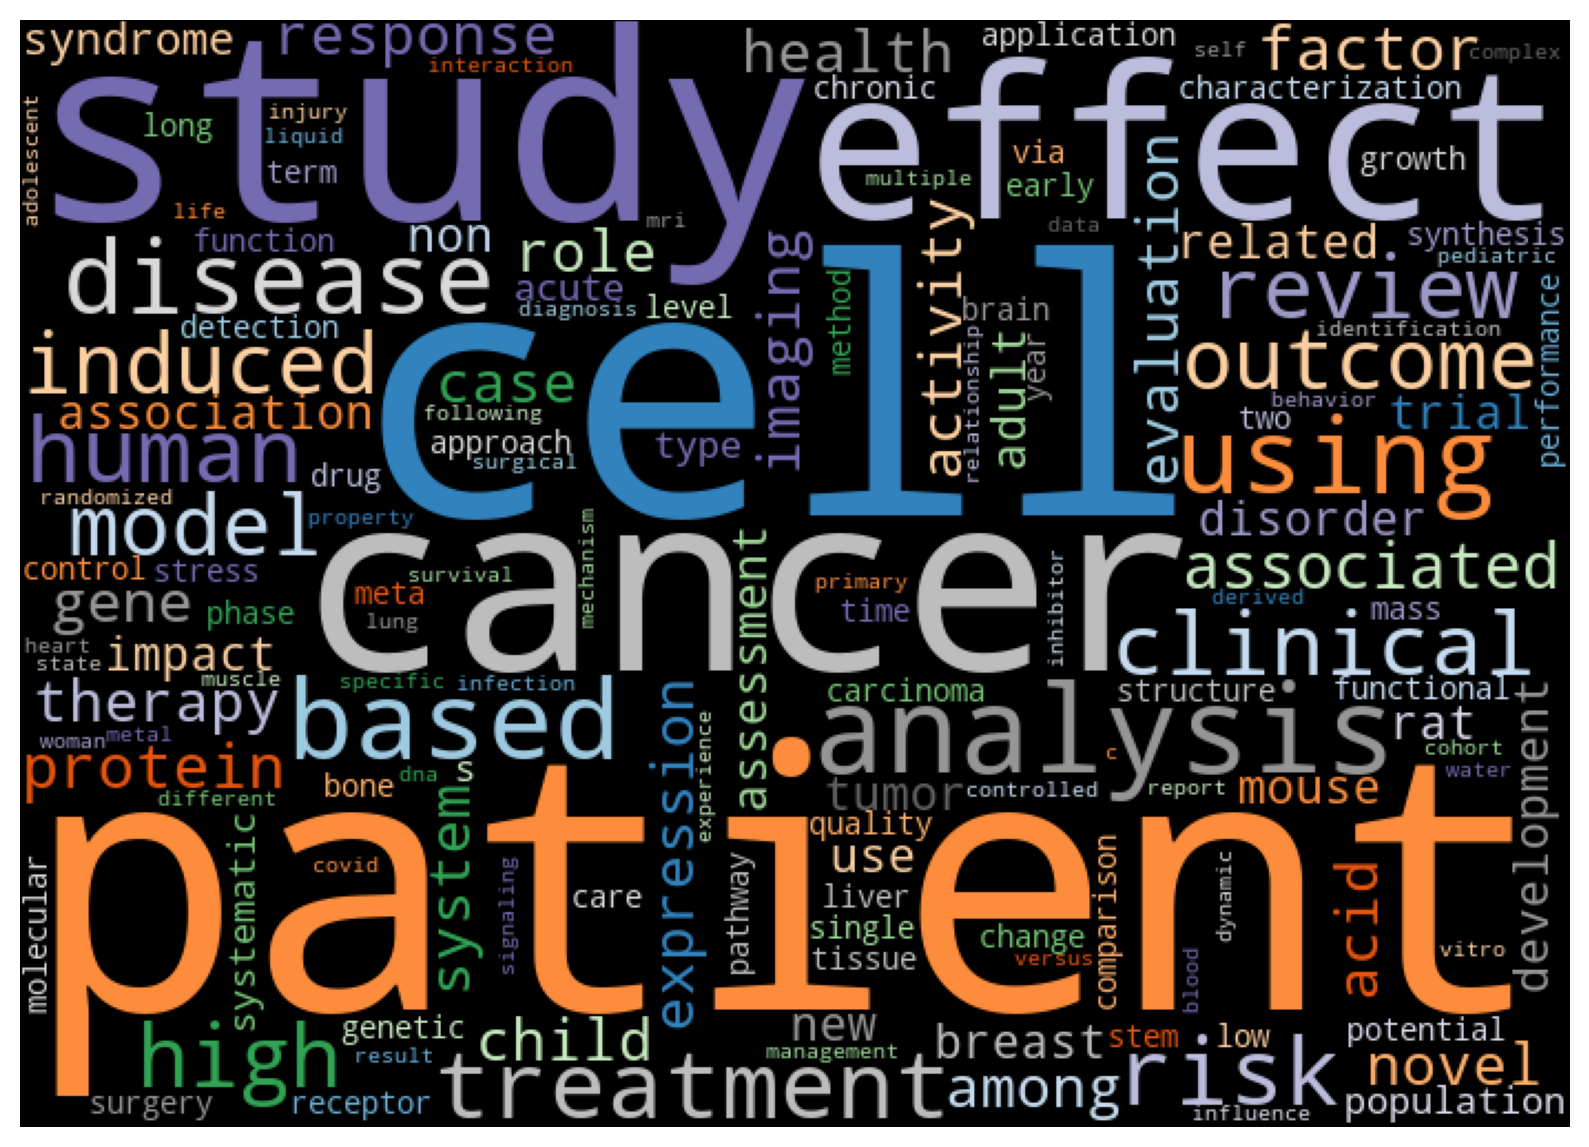

In [50]:
generate_wordcloud(' '.join(df[df.type == 'research_discourse']['title_lemmatized']))

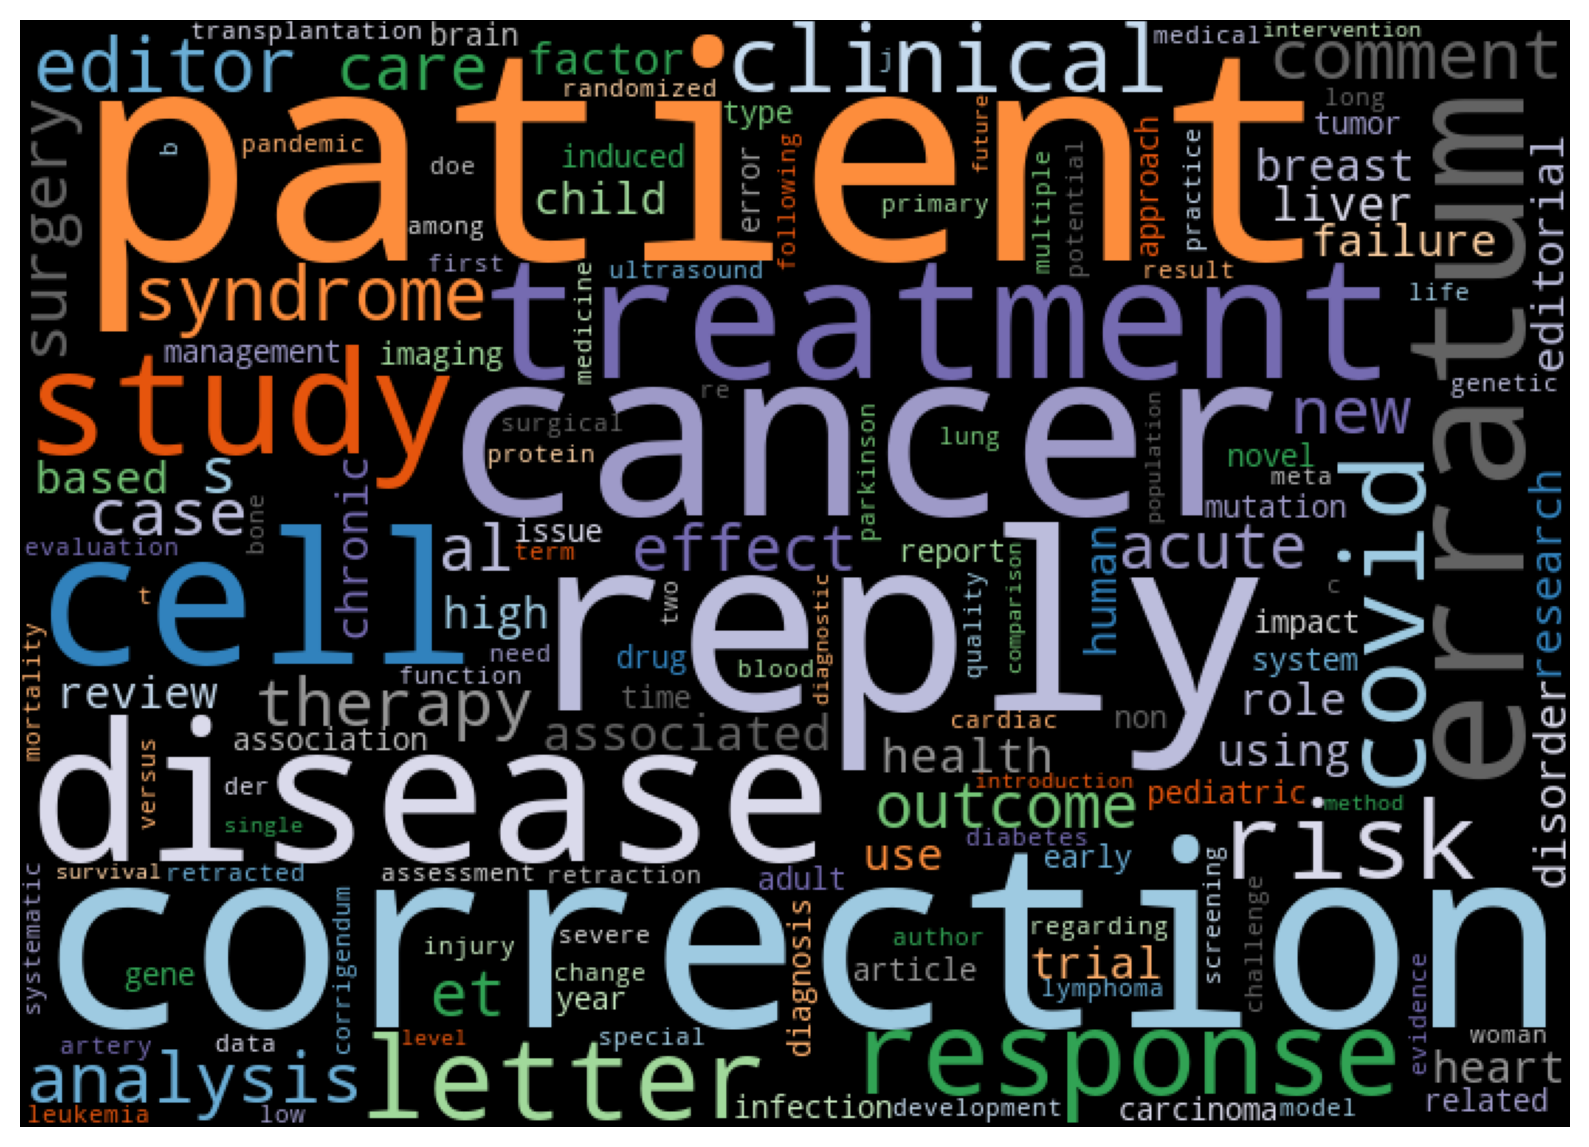

In [51]:
generate_wordcloud(' '.join(df[df.type == 'editorial_discourse']['title_lemmatized']))

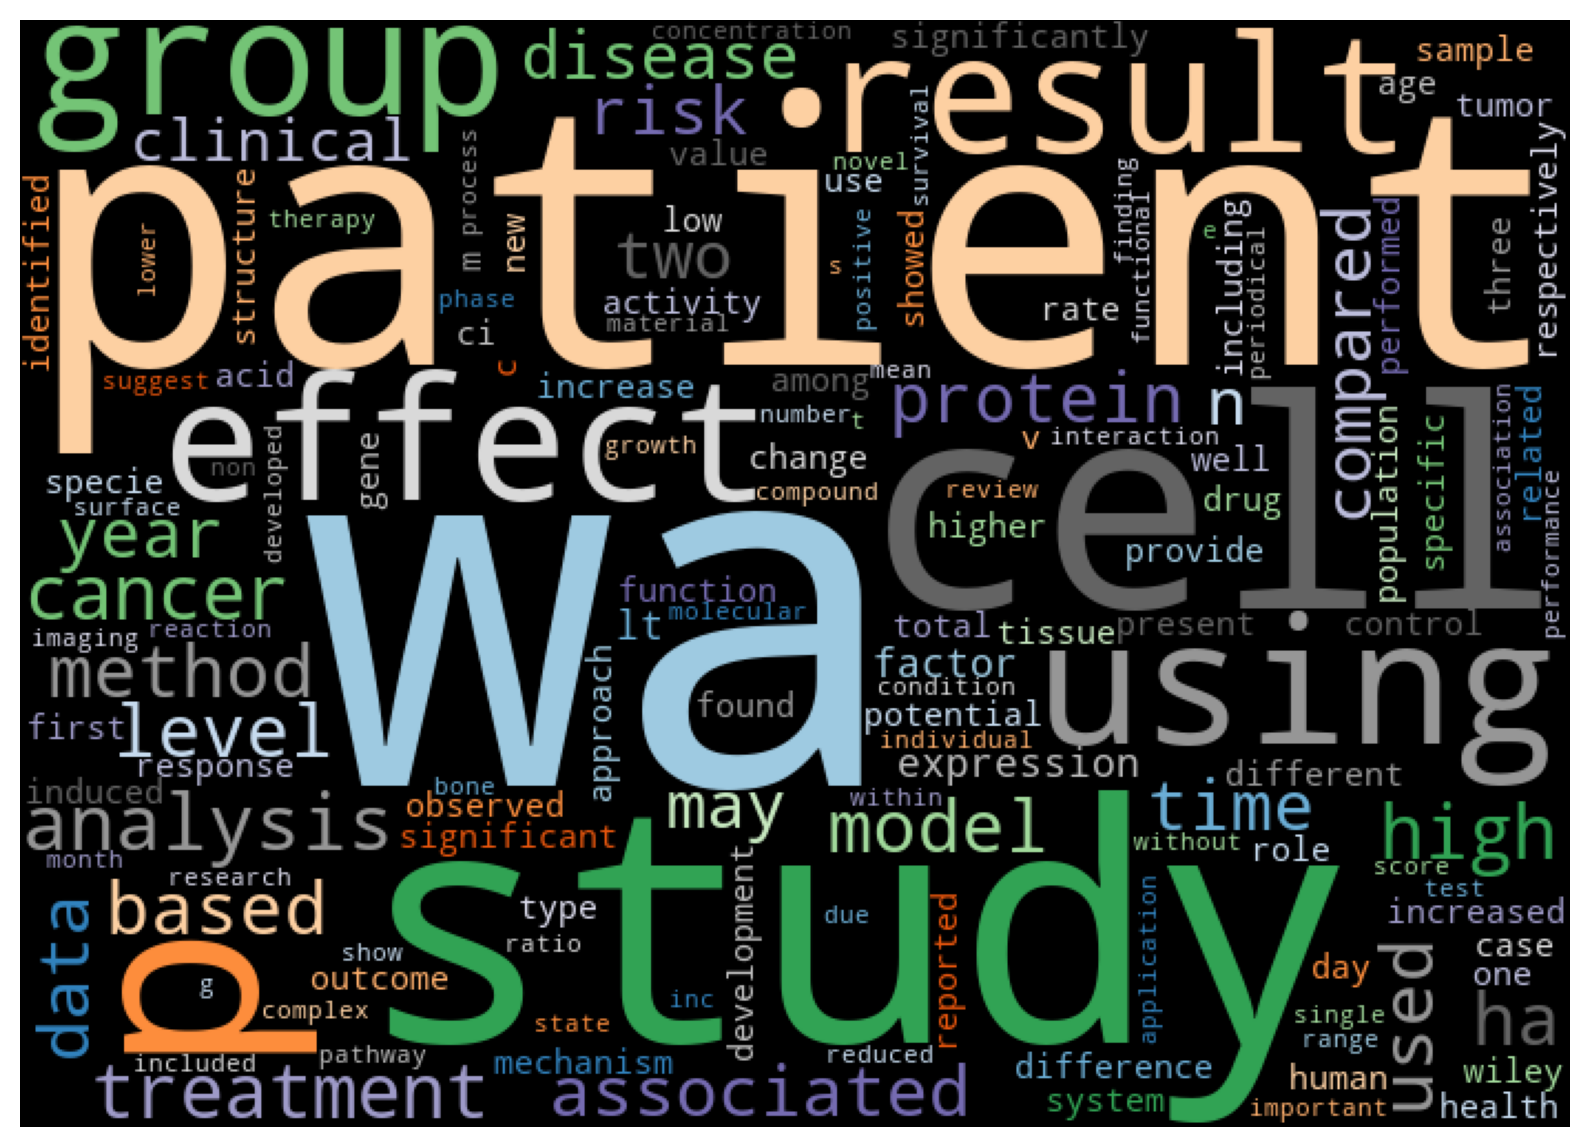

In [52]:
generate_wordcloud(' '.join(df[df.type == 'research_discourse']['abstract_lemmatized']))

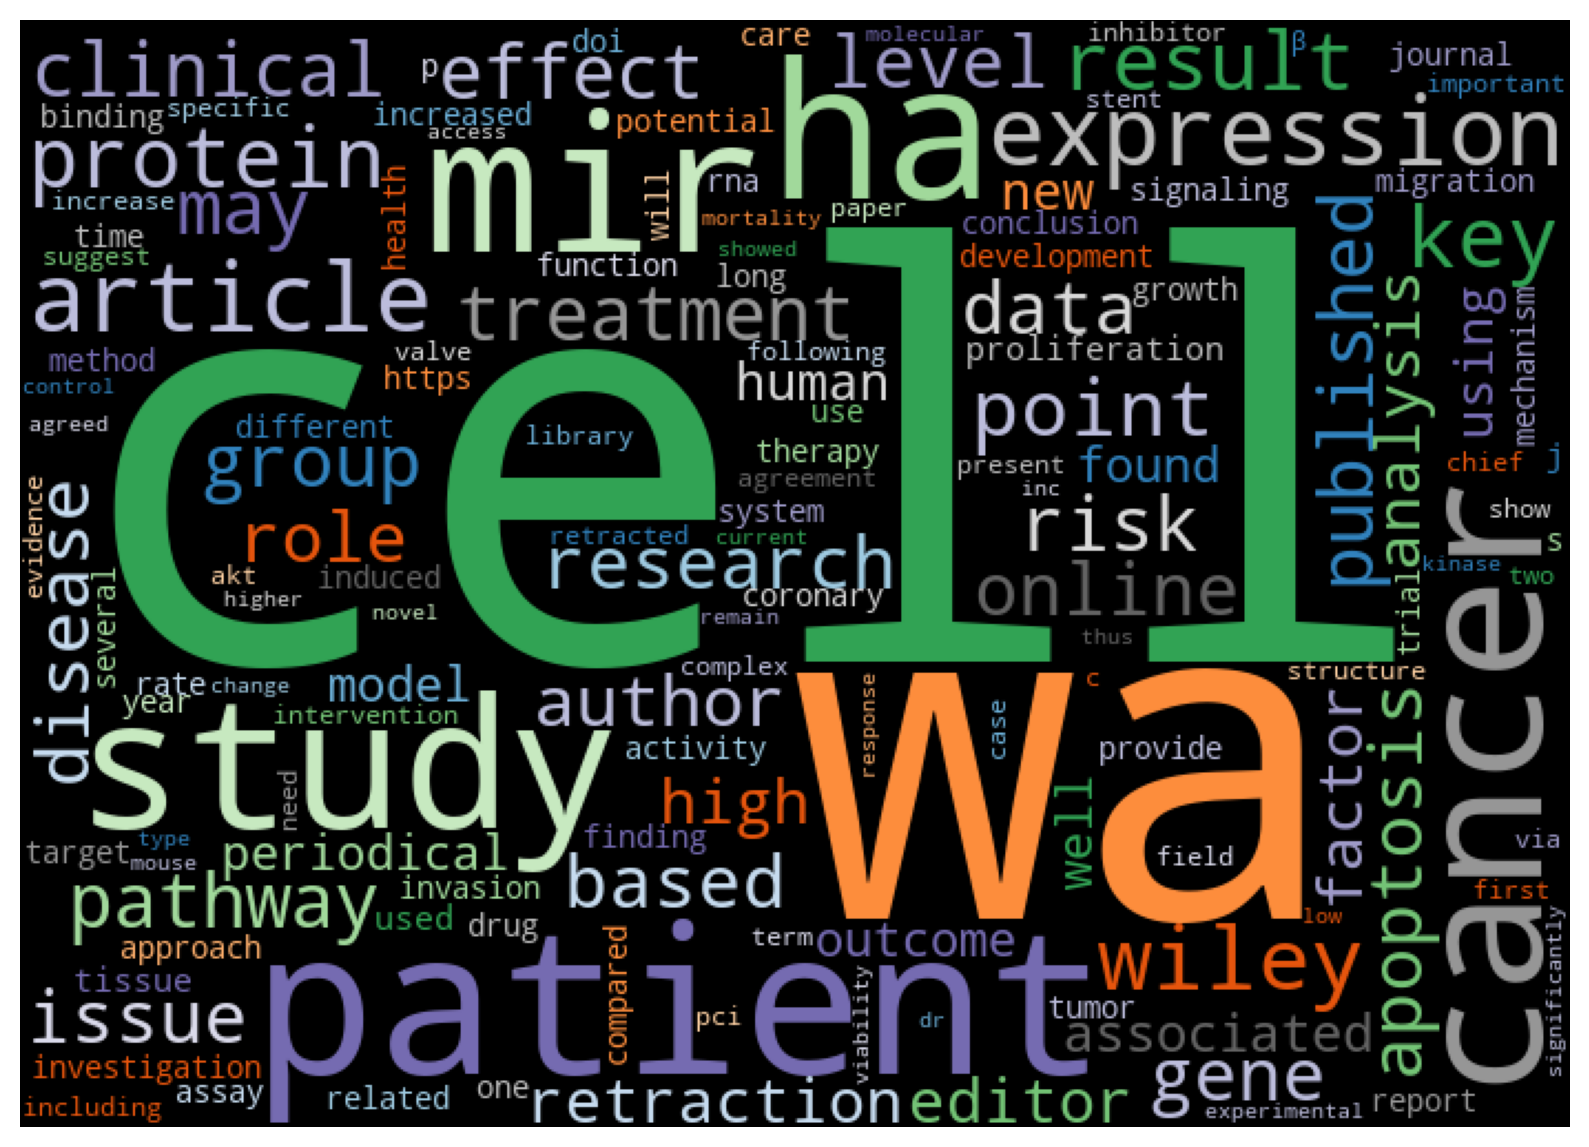

In [53]:
generate_wordcloud(' '.join(df[df.type == 'editorial_discourse']['abstract_lemmatized']))

In [6]:
host = os.environ['KB_HOST']
database = os.environ['KB_DATABASE']
user = os.environ['KB_USER']
pw = os.environ['KB_PASSWORD']
port = os.environ['KB_PORT']
engine = create_engine(f'postgresql://{user}:{pw}@{host}:{port}/{database}')

In [20]:
oal_type_oa = pd.read_sql("""
                          SELECT COUNT(DISTINCT(d.doi)) AS n, d.type AS type, pl.is_oa AS is_oa
                          FROM unignhaupka.oal_doc_dataset d
                          JOIN fiz_openalex_rep_20230819_openbib.works w
                              ON LOWER(TRIM('https://doi.org/' FROM w.doi)) = LOWER(d.doi)
                          JOIN fiz_openalex_rep_20230819_openbib.works_primary_locations pl
                              ON w.id = pl.work_id
                          GROUP BY d.type, is_oa
                          ORDER BY n DESC
                          """, 
                          con=engine)

In [28]:
oal_type_oa['prop'] = oal_type_oa['n'] / oal_type_oa.groupby(['type'])['n'].transform('sum')
oal_type_oa

n                 type  is_oa      prop
0  4688614   research_discourse  False  0.529887
1  4159719   research_discourse   True  0.470113
2   378522  editorial_discourse   True  0.513189
3   359066  editorial_discourse  False  0.486811
4     8333         not assigned  False  0.555793
5     6660         not assigned   True  0.444207

In [32]:
oal_type_oa_status = pd.read_sql("""
                                 SELECT COUNT(DISTINCT(d.doi)) AS n, d.type AS type, woa.oa_status
                                 FROM unignhaupka.oal_doc_dataset d
                                 JOIN fiz_openalex_rep_20230819_openbib.works w
                                     ON LOWER(TRIM('https://doi.org/' FROM w.doi)) = LOWER(d.doi)
                                 JOIN fiz_openalex_rep_20230819_openbib.works_open_access woa
                                     ON w.id = woa.work_id
                                 GROUP BY d.type, woa.oa_status
                                 ORDER BY n DESC
                                 """, 
                                 con=engine)

In [42]:
oal_type_oa_status['prop'] = oal_type_oa_status['n'] / oal_type_oa_status.groupby(['type'])['n'].transform('sum')
oal_type_oa_status

n                 type oa_status      prop
0   3729869   research_discourse    closed  0.421528
1   2519459   research_discourse      gold  0.284735
2   1082114   research_discourse     green  0.122294
3    899542   research_discourse    bronze  0.101661
4    617465   research_discourse    hybrid  0.069782
5    333787  editorial_discourse    closed  0.452554
6    219087  editorial_discourse    bronze  0.297042
7    110080  editorial_discourse      gold  0.149248
8     48280  editorial_discourse     green  0.065459
9     26328  editorial_discourse    hybrid  0.035696
10     7819         not assigned    closed  0.521719
11     4442         not assigned    bronze  0.296390
12     1181         not assigned      gold  0.078802
13      984         not assigned     green  0.065657
14      561         not assigned    hybrid  0.037432

In [45]:
oal_type_apc = pd.read_sql("""
                           SELECT COUNT(DISTINCT(d.doi)) AS n, d.type AS type, AVG((apc_list->>'value_usd')::numeric) AS apc
                           FROM unignhaupka.oal_doc_dataset d
                           JOIN fiz_openalex_rep_20230819_openbib.works w
                               ON LOWER(TRIM('https://doi.org/' FROM w.doi)) = LOWER(d.doi)
                           GROUP BY d.type
                           ORDER BY n DESC
                           """, 
                           con=engine)

In [46]:
oal_type_apc

n                 type          apc
0  8847736   research_discourse  3096.029307
1   737509  editorial_discourse  3882.455098
2    14985         not assigned  4056.178471

In [53]:
oal_type_license = pd.read_sql("""
                               SELECT COUNT(DISTINCT(d.doi)) AS n, d.type AS type, pl.license as license
                               FROM unignhaupka.oal_doc_dataset d
                               JOIN fiz_openalex_rep_20230819_openbib.works w
                                   ON LOWER(TRIM('https://doi.org/' FROM w.doi)) = LOWER(d.doi)
                               JOIN fiz_openalex_rep_20230819_openbib.works_primary_locations pl
                                   ON w.id = pl.work_id
                               GROUP BY d.type, license
                               ORDER BY n DESC
                               """, 
                               con=engine)

In [59]:
oal_type_license['prop'] = (oal_type_license['n'] / oal_type_license.groupby(['type'])['n'].transform('sum')) * 100
oal_type_license.sort_values(by=['license'])

n                 type  \
48        1   research_discourse   
29      482  editorial_discourse   
16     8159   research_discourse   
1   2095784   research_discourse   
6     73645  editorial_discourse   
25      903         not assigned   
4    316148   research_discourse   
32      188         not assigned   
12    14270  editorial_discourse   
3    334125   research_discourse   
31      271         not assigned   
11    22523  editorial_discourse   
33       74         not assigned   
8     53272   research_discourse   
19     3926  editorial_discourse   
39       29  editorial_discourse   
26      692   research_discourse   
34       56  editorial_discourse   
22     1844   research_discourse   
45        2         not assigned   
46        2         not assigned   
17     7090   research_discourse   
38       43  editorial_discourse   
41        7   research_discourse   
42        7  editorial_discourse   
5    137892   research_discourse   
10    25760  editorial_discourse   
28      514         not assigned   
27      585  editorial_discourse   
40       17         not assigned   
13    13660   research_discourse   
15    10135   research_discourse   
23     1346  editorial_discourse   
37       46         not assigned   
49        1         not assigned   
21     2550   research_discourse   
36       52  editorial_discourse   
18     4207   research_discourse   
24     1332  editorial_discourse   
47        1         not assigned   
9     34554   research_discourse   
30      359  editorial_discourse   
44        4         not assigned   
35       53         not assigned   
7     54151   research_discourse   
20     2840  editorial_discourse   
43        5   research_discourse   
0   5773577   research_discourse   
2    590303  editorial_discourse   
14    12909         not assigned   

                                              license       prop  
48                                       acs-specific   0.000011  
29  acs-specific: authorchoice/editors choice usag...   0.065351  
16  acs-specific: authorchoice/editors choice usag...   0.092214  
1                                               cc-by  23.686922  
6                                               cc-by   9.984977  
25                                              cc-by   6.026026  
4                                            cc-by-nc   3.573161  
32                                           cc-by-nc   1.254588  
12                                           cc-by-nc   1.934763  
3                                         cc-by-nc-nd   3.776340  
31                                        cc-by-nc-nd   1.808475  
11                                        cc-by-nc-nd   3.053726  
33                                        cc-by-nc-sa   0.493827  
8                                         cc-by-nc-sa   0.602090  
19                                        cc-by-nc-sa   0.532297  
39                                           cc-by-nd   0.003932  
26                                           cc-by-nd   0.007821  
34                                           cc-by-sa   0.007593  
22                                           cc-by-sa   0.020841  
45                                           cc-by-sa   0.013347  
46                                                cc0   0.013347  
17                                                cc0   0.080132  
38                                                cc0   0.005830  
41                                  elsevier-specific   0.000079  
42                                  elsevier-specific   0.000949  
5                  elsevier-specific: oa user license   1.558480  
10                 elsevier-specific: oa user license   3.492607  
28                 elsevier-specific: oa user license   3.430097  
27                                         implied-oa   0.079316  
40                                         implied-oa   0.113447  
13                                         implied-oa   0.154388  
15                           